## EDA for the crime data

In [15]:
import pandas as pd 
import numpy as np
from steps.step1_basic_data_inspection import DataInspectionStrategy, DataTypesInspectionStrategy, DataInspector, SummaryStatisticsInspectionStrategy
from steps.step2_missing_values_inspection import SimpleMissingValueAnalysis, MissingValuesTemplate
from steps.step3_univariate_inspection import NumericalUnivariateAnalysis, UnivariateAnalyzer, UnivariateAnalysisStrategy, FeatureUniqueValues
from steps.step4_bivariate_analysis import NumericalBivariateAnalysis, BivariateAnalysisStrategy, BivariateAnalyzer
from steps.step5_multivariate_analysis import SimpleMultivariateAnalysis, MultivariateAnalysisTemplate
from steps.step6_model_suggestion import ModelSuggester, ModelSuggestionStrategy, HeatmapStrategy, PairPlotsStrategy

In [3]:
datapath = (r"C:\Users\Junior\Desktop\Predictive-Policing-Advisory\artifacts\data_ingestion\Kampala_Theft_Dataset.csv")
df = pd.read_csv(datapath)

## DataTypes Inspection

In [4]:
#Step 1: Basic data types Inspection 
#---------------------------------------------------------------------------#
#Initialise the data inspector with a specific strategy
data_inspector = DataInspector(DataTypesInspectionStrategy())
data_inspector.execute_inspection(df)


Data Types and Non-Null Counts:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 20000 entries, 0 to 19999
Data columns (total 13 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   area_id                  20000 non-null  object 
 1   area_name                20000 non-null  object 
 2   region                   20000 non-null  object 
 3   month                    20000 non-null  int64  
 4   year                     20000 non-null  int64  
 5   total_thefts_last_month  20000 non-null  int64  
 6   theft_trend              20000 non-null  float64
 7   youth_unemp_rate         20000 non-null  float64
 8   pop_density_sqkm         20000 non-null  int64  
 9   landuse_mix              20000 non-null  object 
 10  lighting_index           20000 non-null  float64
 11  police_per_10k           20000 non-null  int64  
 12  high_risk_next_month     20000 non-null  int64  
dtypes: float64(3), int64(6), object(4)
memory u

In [5]:
## Print Data Columns and their datatypes for schema file 
print(df.dtypes.to_dict())

{'area_id': dtype('O'), 'area_name': dtype('O'), 'region': dtype('O'), 'month': dtype('int64'), 'year': dtype('int64'), 'total_thefts_last_month': dtype('int64'), 'theft_trend': dtype('float64'), 'youth_unemp_rate': dtype('float64'), 'pop_density_sqkm': dtype('int64'), 'landuse_mix': dtype('O'), 'lighting_index': dtype('float64'), 'police_per_10k': dtype('int64'), 'high_risk_next_month': dtype('int64')}


## Statistical Summary

In [7]:
# Step 1: Basic data Inspection 
#---------------------------------------------------------------------------#
#Switch strategy to statistics and execute
data_inspector.set_strategy(SummaryStatisticsInspectionStrategy())
data_inspector.execute_inspection(df)


Summary Statistics (Numerical Features):
              month          year  total_thefts_last_month   theft_trend  \
count  20000.000000  20000.000000             20000.000000  20000.000000   
mean       6.459350   2024.001000                49.557950      0.012974   
std        3.439163      0.815188                28.866832      1.155032   
min        1.000000   2023.000000                 0.000000     -2.000000   
25%        3.000000   2023.000000                24.000000     -1.000000   
50%        6.000000   2024.000000                50.000000      0.020000   
75%        9.000000   2025.000000                75.000000      1.020000   
max       12.000000   2025.000000                99.000000      2.000000   

       youth_unemp_rate  pop_density_sqkm  lighting_index  police_per_10k  \
count      20000.000000      20000.000000    20000.000000    20000.000000   
mean           0.300863      15030.043750        0.649108       16.028800   
std            0.115816       5775.347681 

## Missing Values Inspection


 Missing Values Count by Column
Series([], dtype: int64)

 Visualising the missing Values


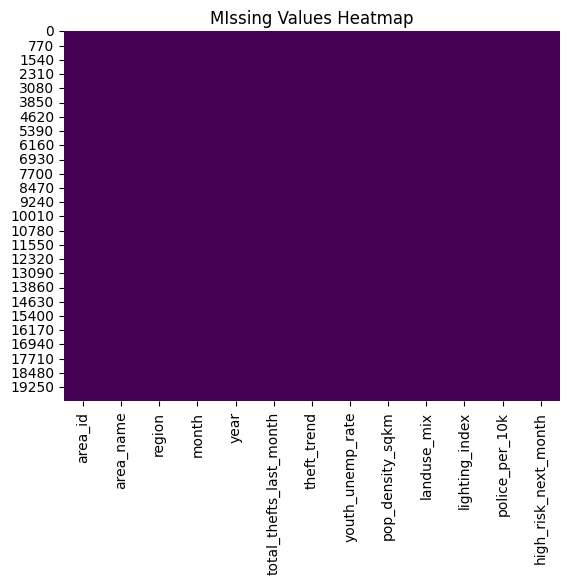

In [9]:
#Step 2: Missing Value Analysis 
# ----------------------------------------------------------#
#Perform missing value Analysis 
missing_value_analyzer = SimpleMissingValueAnalysis()
missing_value_analyzer.analyse(df)

## Step 3: Univariate Analysis

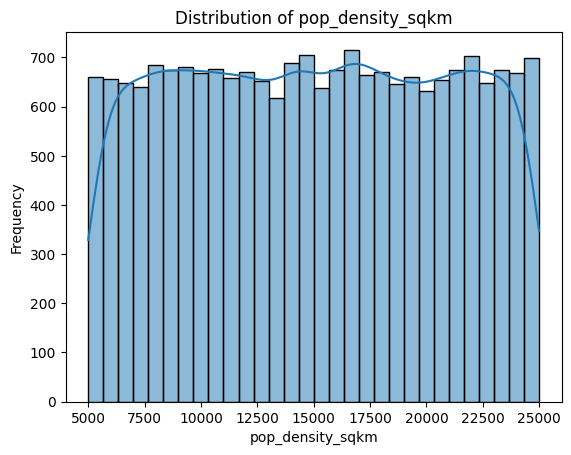

In [13]:
#Step 3: Univariate Feature Analysis 
#----------------------------------------------------------------------------#
#Analysing a numerical feature 1
univariate_analyzer = UnivariateAnalyzer(NumericalUnivariateAnalysis())
univariate_analyzer.execute_analysis(df, "pop_density_sqkm")

#This could work for categorical plots if they were available. 
#univariate_analyzer.set_strategy(CategoricalUnivariateAnalysis())
#univariate_analyzer.execute_analysis(df, "gender")  # if 'gender' is categorical

## Bivariate Analysis

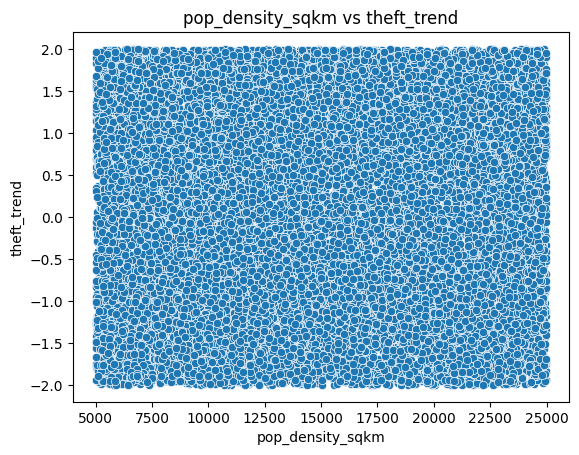

In [16]:
#Step 4: Bivariate Analysis 
#----------------------------------------------------------------------------#
#Analysing a relationship between two numerical features 
bivariate_analyzer = BivariateAnalyzer(NumericalBivariateAnalysis())
bivariate_analyzer.execute_analysis(df, "pop_density_sqkm", "theft_trend")

## Multivariate Analysis

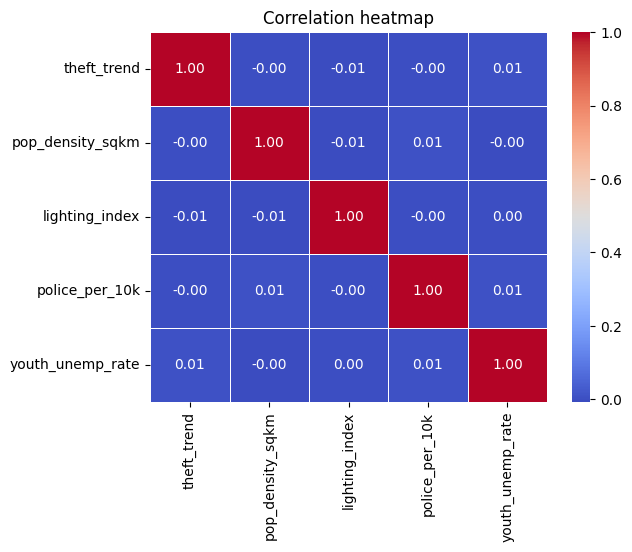

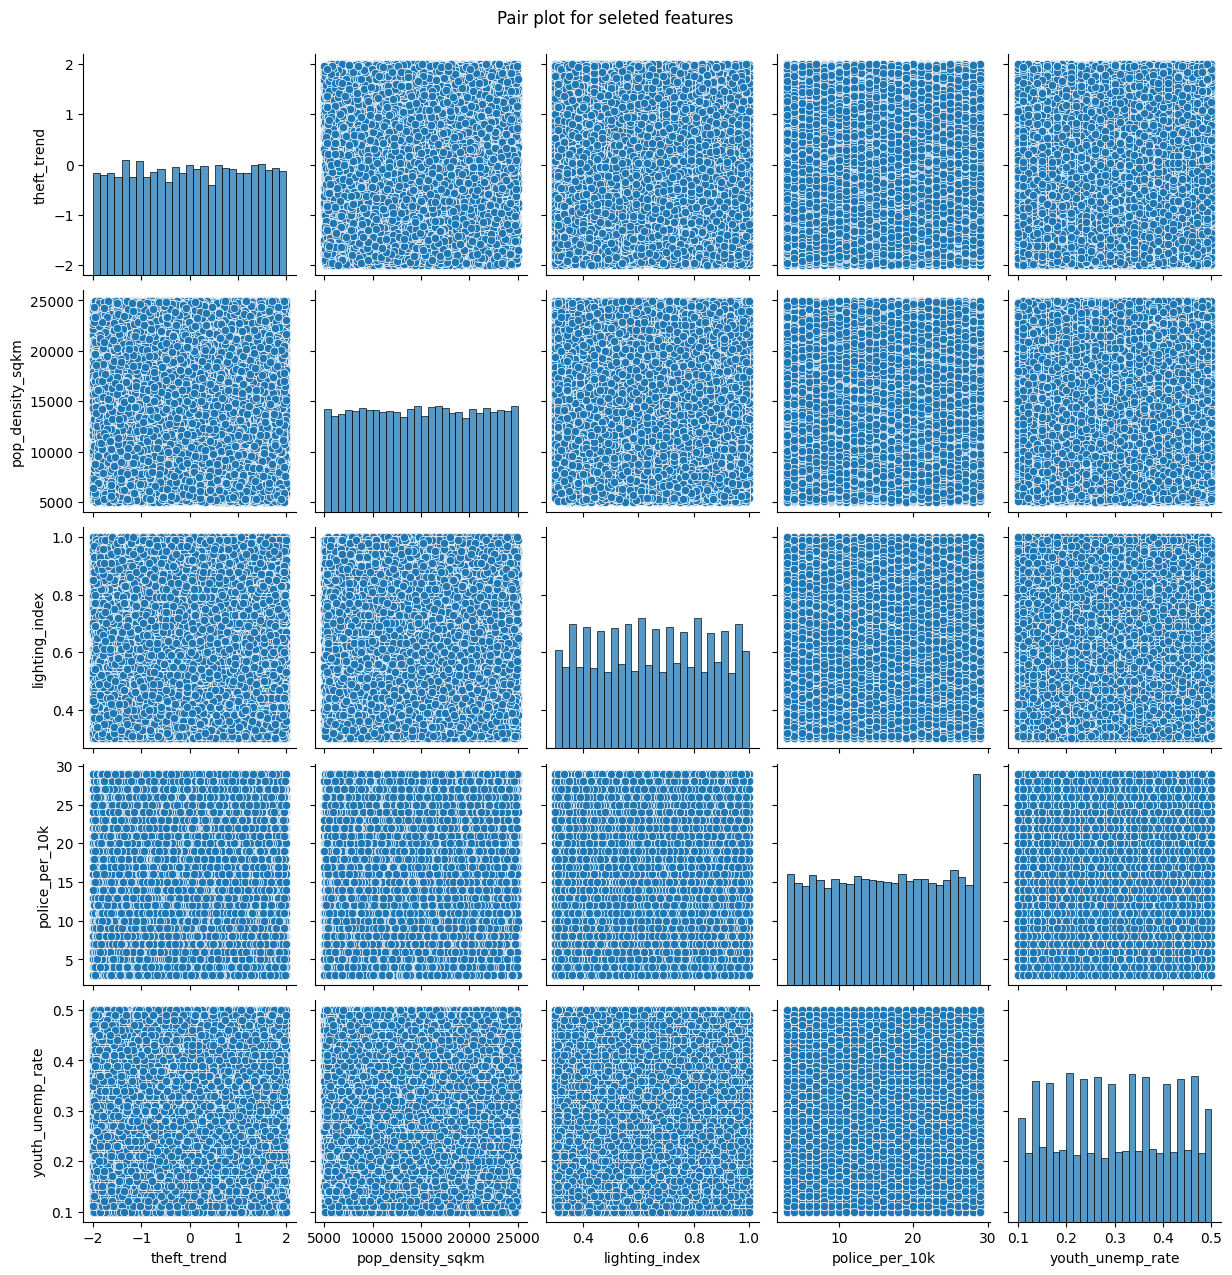

In [17]:
#Step 5: Multivariate Analysis 
#--------------------------------------------------------------------------------------------------------#
#Perform multivariate Analysis 
#Initialize multivariate analyzer with a simple multivariate Analysis 
multivariate_analyzer  = SimpleMultivariateAnalysis()
#Select important features for Analysis
selected_features = df[["theft_trend", "pop_density_sqkm", "lighting_index", "police_per_10k", "youth_unemp_rate"]]
#Excute Multivariate Analysis 
multivariate_analyzer.analyse(selected_features)